<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Dirac_Equation_Solver_Memory_Effects_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

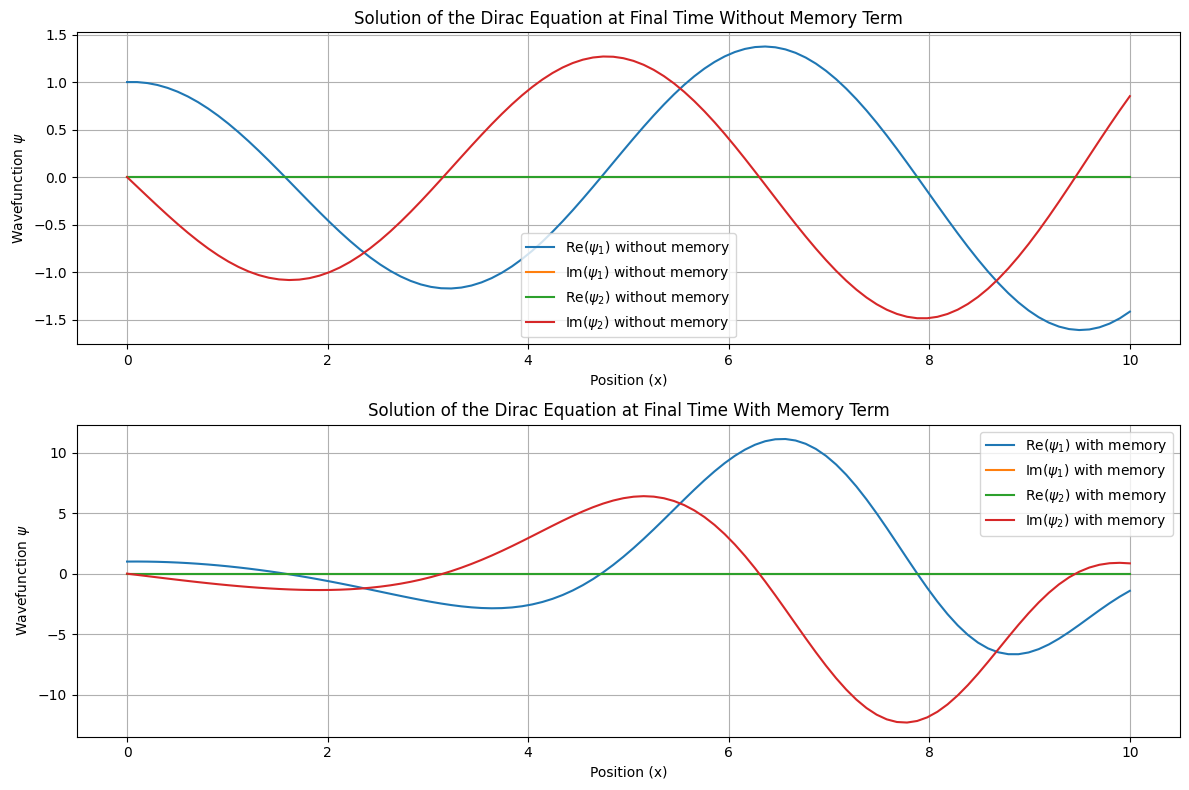

In [1]:
!pip install numpy matplotlib scipy
import numpy as np
import matplotlib.pyplot as plt
# Constants and parameters
m = 1.0  # mass
c = 1.0  # speed of light
F0 = 1.0 # Constant for the integral term
a = 0.1  # Exponential decay constant
b = 0.1  # Another constant for the exponential term

# Discretize space and time
x = np.linspace(0, 10, 100)  # Spatial domain
t = np.linspace(0, 10, 100)  # Temporal domain
dx = x[1] - x[0]
dt = t[1] - t[0]
# Initial conditions: psi(x=0) = (1, 0) for all t
psi1_no_memory = np.zeros((len(x), len(t)), dtype=complex)
psi2_no_memory = np.zeros((len(x), len(t)), dtype=complex)
psi1_no_memory[0, :] = 1 + 0j

# Iterative method without memory term
for n in range(1, len(t)):
    for j in range(1, len(x)):
        psi1_no_memory[j, n] = psi1_no_memory[j-1, n-1] + (-1j * m * c * psi2_no_memory[j-1, n-1]) * dt
        psi2_no_memory[j, n] = psi2_no_memory[j-1, n-1] + (-1j * m * c * psi1_no_memory[j-1, n-1]) * dt

# Function to compute the integral term at each time step
def compute_time_delayed_integral(psi_history, t_now, x_index):
    integral_psi = 0
    for k, tau in enumerate(t[:np.searchsorted(t, t_now)]):
        integral_psi += np.exp(-a * (t_now - tau)**2) * np.exp(-b * tau**2) * psi_history[x_index, k] * dt
    return integral_psi

# Initial conditions with memory term
psi1 = np.zeros((len(x), len(t)), dtype=complex)
psi2 = np.zeros((len(x), len(t)), dtype=complex)
psi1[0, :] = 1 + 0j

# Iterative method with memory term
for n in range(1, len(t)):
    for j in range(1, len(x)):
        integral_psi1 = compute_time_delayed_integral(psi1, t[n], j)
        integral_psi2 = compute_time_delayed_integral(psi2, t[n], j)
        psi1[j, n] = psi1[j-1, n-1] + (-1j * m * c * psi2[j-1, n-1] + F0 * integral_psi1) * dt
        psi2[j, n] = psi2[j-1, n-1] + (-1j * m * c * psi1[j-1, n-1] + F0 * integral_psi2) * dt

# Plot the results for the final time step for both cases
plt.figure(figsize=(12, 8))

# Without memory term
plt.subplot(2, 1, 1)
plt.plot(x, psi1_no_memory[:, -1].real, label='Re($\psi_1$) without memory')
plt.plot(x, psi1_no_memory[:, -1].imag, label='Im($\psi_1$) without memory')
plt.plot(x, psi2_no_memory[:, -1].real, label='Re($\psi_2$) without memory')
plt.plot(x, psi2_no_memory[:, -1].imag, label='Im($\psi_2$) without memory')
plt.title('Solution of the Dirac Equation at Final Time Without Memory Term')
plt.xlabel('Position (x)')
plt.ylabel('Wavefunction $\psi$')
plt.legend()
plt.grid()

# With memory term
plt.subplot(2, 1, 2)
plt.plot(x, psi1[:, -1].real, label='Re($\psi_1$) with memory')
plt.plot(x, psi1[:, -1].imag, label='Im($\psi_1$) with memory')
plt.plot(x, psi2[:, -1].real, label='Re($\psi_2$) with memory')
plt.plot(x, psi2[:, -1].imag, label='Im($\psi_2$) with memory')
plt.title('Solution of the Dirac Equation at Final Time With Memory Term')
plt.xlabel('Position (x)')
plt.ylabel('Wavefunction $\psi$')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
